# Exploratory Data Analysis in Python 
EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In this module we will be working on House Price Prediction Dataset.
we will cover :
              - Basics of EDA
              - Handling Missing values
              - Detecting Outliers 
              - Handling Outliers
              - Histogram
              - Correlation Heatmap
              - Scatterplot
              - Boxplot
              - Feature Engineering

### Import Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os

%matplotlib inline

In [2]:
# Read CSV file in Pandas dataframe
os.chdir("E:\Project=House Prices Advanced Regression Techniques")
data=pd.read_csv("train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In this above dataset, SalePrice column is dependent variable and 
other columns are indepandent variables which are correlated to dependent variable.

In [4]:
data.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#Check shape of dataframe
data.shape

(1460, 81)

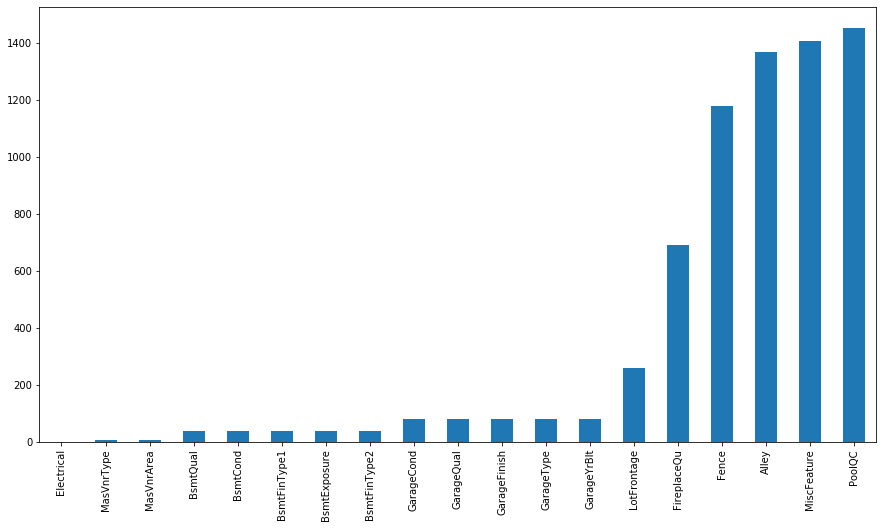

In [6]:
#Handling Missing values
missing=data.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(15,8))
missing.plot.bar() 

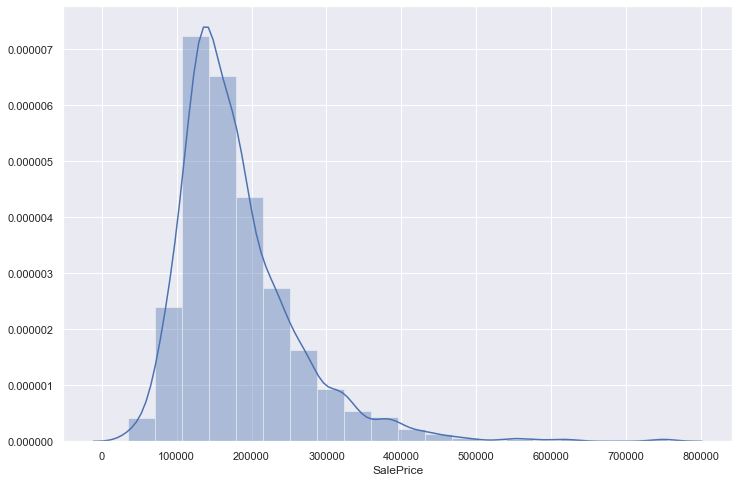

In [7]:
#plot distplot
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(data['SalePrice'],kde=True,bins=20);

In [8]:
data['SalePrice'].describe()#data describtion

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Correlation

In [9]:
numeric_features=data.select_dtypes(include=[np.number])
numeric_features.columns#numeric_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
categorical_features=data.select_dtypes(include=[np.object])
categorical_features.columns#categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
#Correlation between saleprice and numeric_features
#Selecting top correlated features
correlation=numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending=False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Text(0.5, 1, 'correlation of numeric features with Sale Price')

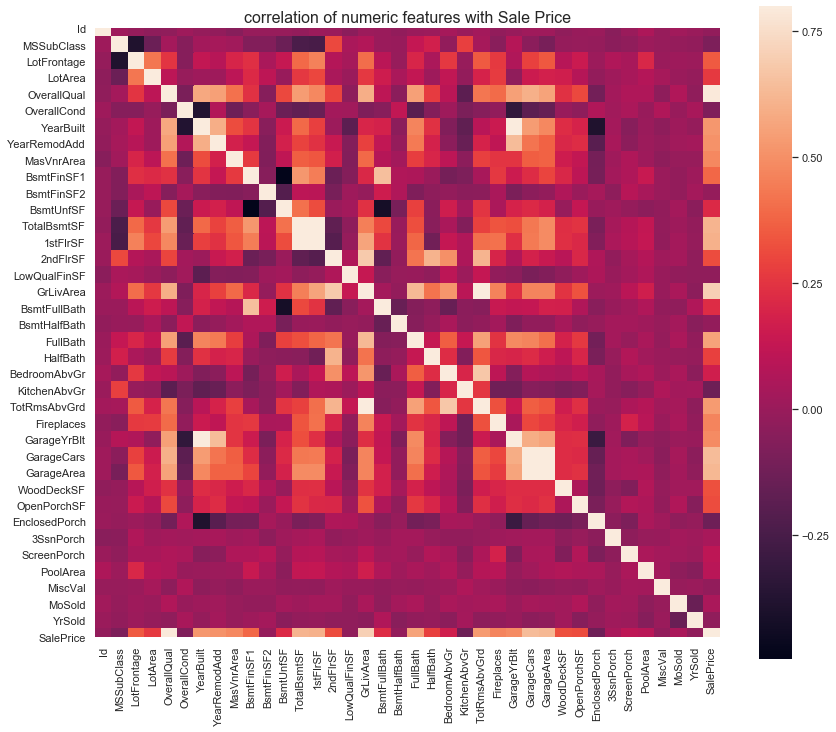

In [12]:
#plot heatmap of correlation of numeric features with Sale Price
f,ax=plt.subplots(figsize=(14,12))
sns.heatmap(correlation,square=True,vmax=0.8)
plt.title('correlation of numeric features with Sale Price',y=1,size=16)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


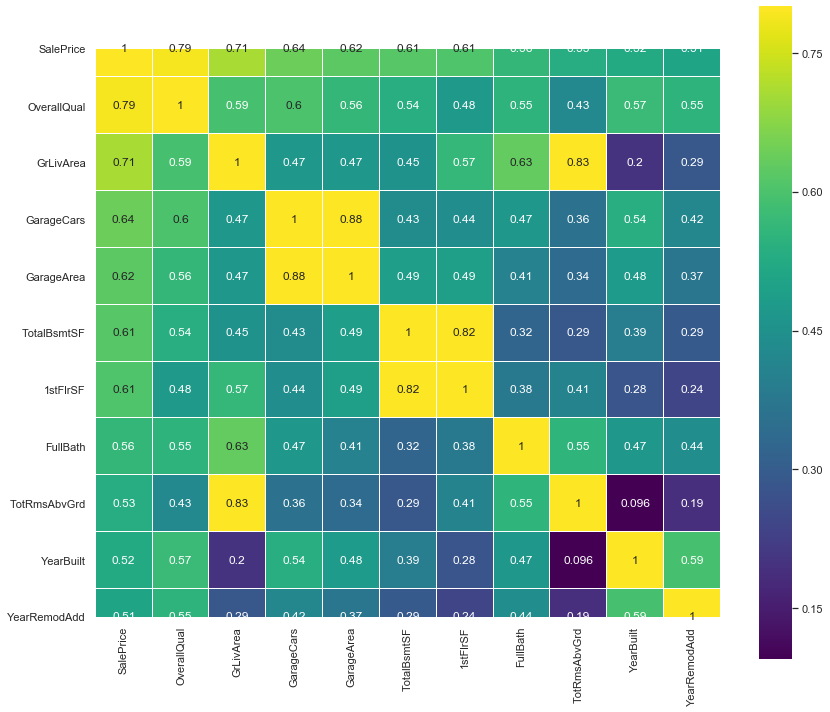

In [13]:
#plot heatmap of correlation of k features with Sale Price
k=11
cols=correlation.nlargest(k,'SalePrice')['SalePrice'].index  
print(cols)
cm=np.corrcoef(data[cols].values.T)
f,ax=plt.subplots(figsize=(14,12))
sns.heatmap(cm,vmax=0.8,linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels=cols.values,annot_kws={'size':12},yticklabels=cols.values)

### Scatterplot
Scatter plots are the graphs that present the relationship between two variables in a data-set. It represents data points on a two-dimensional plane or on a Cartesian system. The variable or attribute which is independent is plotted on the X-axis, while the dependent variable is plotted on the Y-axis. These plots are often called scatter graphs

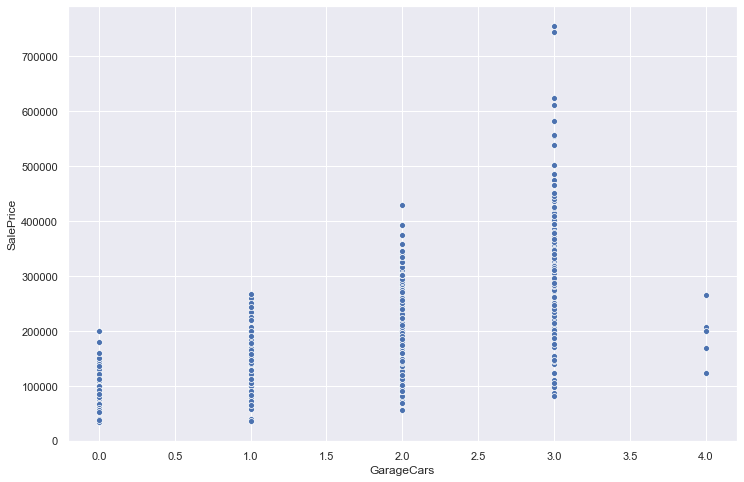

In [14]:
#plot scattrplot
sns.scatterplot(x='GarageCars',y='SalePrice',data=data)

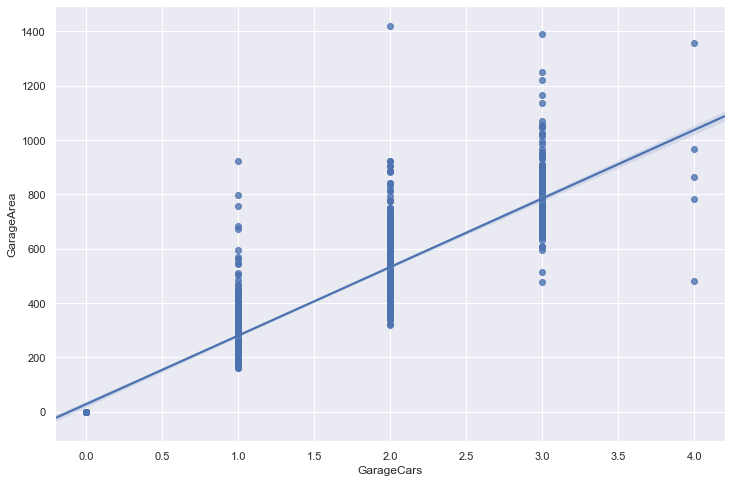

In [15]:
#plot regplot(to see correlation between two independent variables)
sns.regplot(x='GarageCars',y='GarageArea',data=data,scatter=True,fit_reg=True)

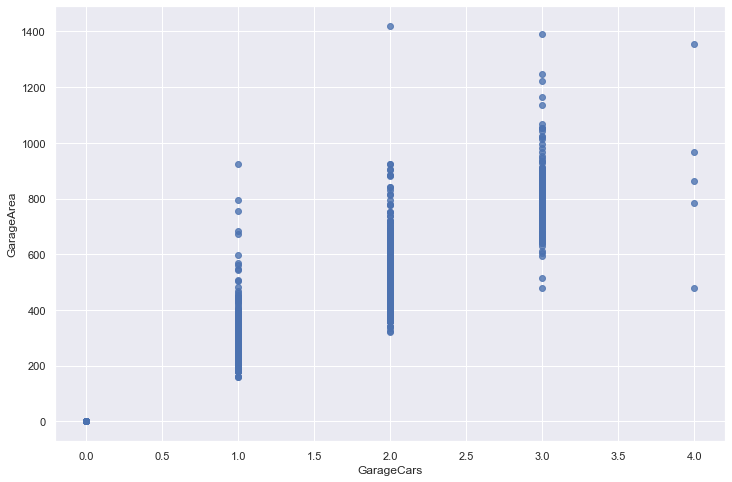

In [16]:
sns.regplot(x='GarageCars',y='GarageArea',data=data,scatter=True,fit_reg=False)

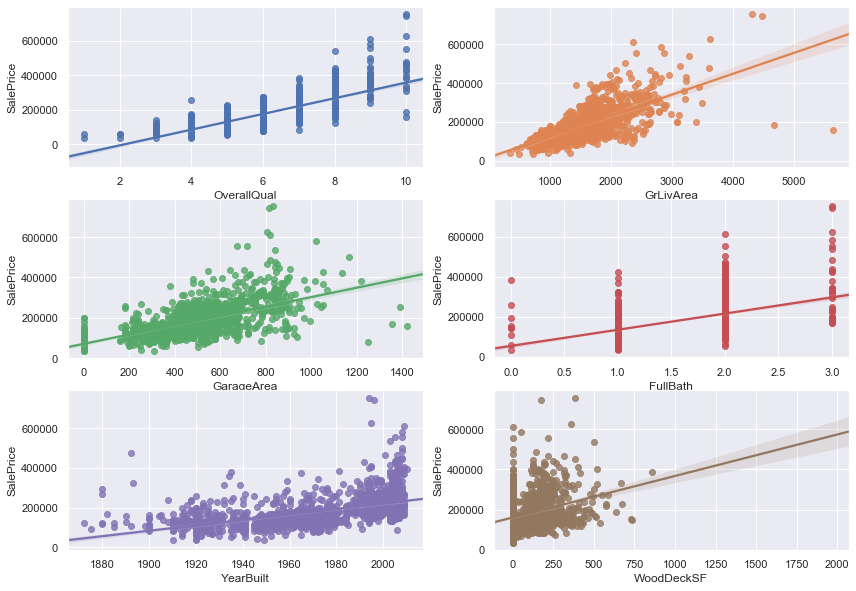

In [17]:
#Scatter plots between the most correlated Variables
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6))= plt.subplots(nrows=3, ncols=2, figsize=(14,10))
sns.regplot(x='OverallQual',y='SalePrice',data=data,scatter=True,fit_reg=True, ax=ax1)

sns.regplot(x='GrLivArea',y='SalePrice',data=data,scatter=True,fit_reg=True, ax=ax2)

sns.regplot(x='GarageArea',y='SalePrice',data=data,scatter=True,fit_reg=True, ax=ax3)

sns.regplot(x='FullBath',y='SalePrice',data=data,scatter=True,fit_reg=True, ax=ax4)

sns.regplot(x='YearBuilt',y='SalePrice',data=data,scatter=True,fit_reg=True, ax=ax5)

sns.regplot(x='WoodDeckSF',y='SalePrice',data=data,scatter=True,fit_reg=True, ax=ax6)

### Boxplot

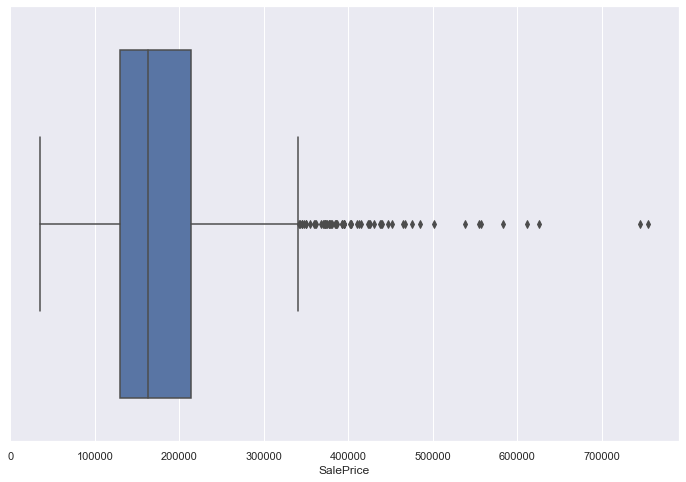

In [18]:
#plot boxplt to Detecting Outliers
sns.boxplot(x=data["SalePrice"])

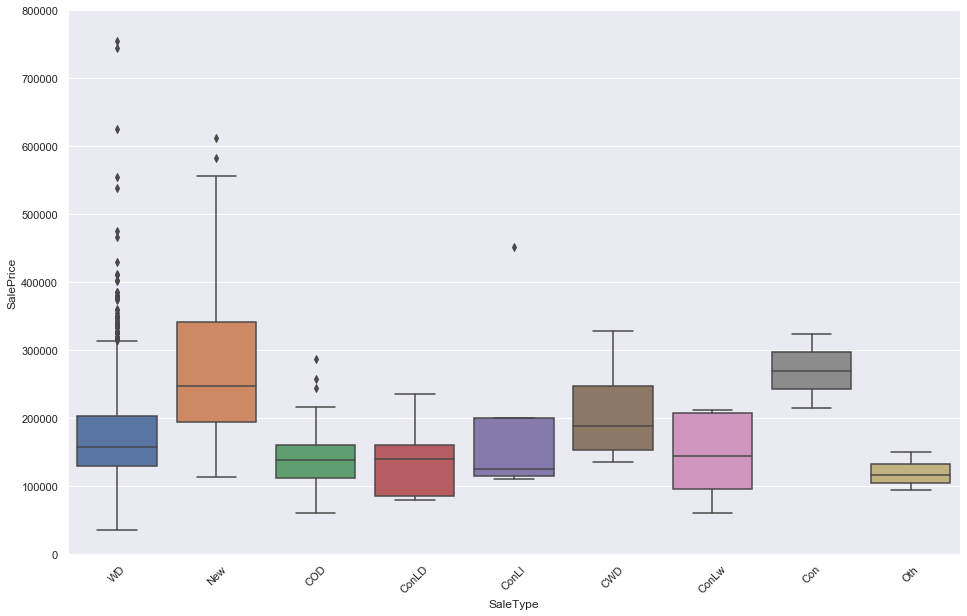

In [19]:
f,ax=plt.subplots(figsize=(16,10))
fig=sns.boxplot(x='SaleType', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=45)

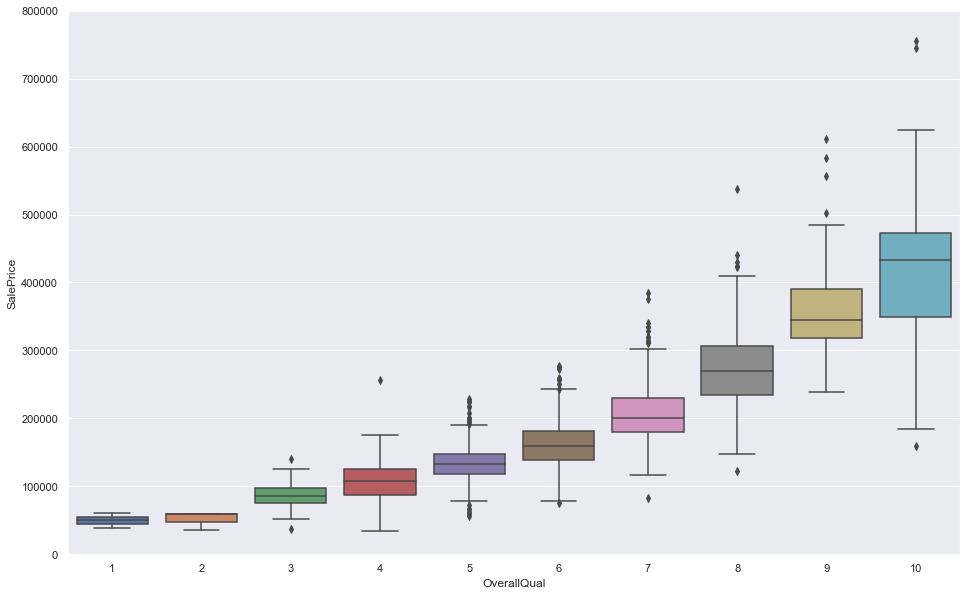

In [20]:
f,ax=plt.subplots(figsize=(16,10))
fig=sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);

### Remove Outliars

In [21]:
first_quartile=data['SalePrice'].quantile(0.25)
third_quartile=data['SalePrice'].quantile(0.75)
IQR=third_quartile-first_quartile 

In [22]:
new_boundary=third_quartile+ 3*IQR

In [23]:
data.drop(data[data["SalePrice"]>new_boundary].index,axis=0,inplace=True)

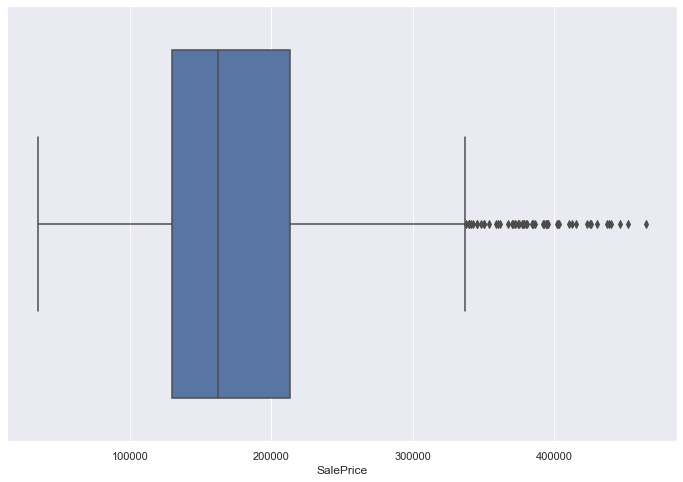

In [24]:
sns.boxplot(x=data["SalePrice"])

### REMOVE BAD FEATURES FROM DATA

Multicollinear features:
   1. GarageArea <-> GarageCars
   2. TotalBsmtSF <-> 1stFlrSF
   3. TotRmsAbvGrd <-> GrLivArea
   4. GrLivArea <-> FullBath
    
Features with missing value more than 20%:
   5. FireplaceQu     690/1460= 47%
   6. Fence           1179/1460= 80%
   7. Alley           1369 > 90%
   8. MiscFeature     1406 > 90%
   9. PoolQC          1453 > 90%
  
Features with poor correlation with the target feature (SalePrice):
   10. LotFrontage     
   11. WoodDeckSF       
   12. 2ndFlrSF         
   13. OpenPorchSF      
   14. HalfBath         
   15. LotArea                 
   16. BedroomAbvGr     
   17. ScreenPorch      
   18. PoolArea         
   19. MoSold           
   20. 3SsnPorch        
   21. BsmtFinSF2      
   22. BsmtHalfBath    
   23. MiscVal         
   24. Id              
   25. LowQualFinSF    
   26. YrSold          
   27. OverallCond     
   28. MSSubClass      
   29. EnclosedPorch   
   30. KitchenAbvGr    


In [25]:
cols_to_remove = ['BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea',
                  'BsmtFullBath','BsmtUnfSF','BedroomAbvGr','ScreenPorch','PoolArea','MoSold','3SsnPorch',
                  'BsmtFinSF2','BsmtHalfBath','MiscVal','Id','LowQualFinSF','YrSold','OverallCond',
                  'MSSubClass','EnclosedPorch','KitchenAbvGr','FireplaceQu','Fence','Alley','MiscFeature',
                  'PoolQC','GarageCars','1stFlrSF','GrLivArea','FullBath']

### Drop the columns

In [26]:
data.drop(cols_to_remove,axis =1,inplace=True)

In [27]:
data.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2003.0,RFn,548,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,1976.0,RFn,460,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2001.0,RFn,608,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,1998.0,Unf,642,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,2000.0,RFn,836,TA,TA,Y,WD,Normal,250000


In [28]:
data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [29]:
data.shape

(1448, 48)